In [4]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

## Read FITS files

Print the metadata information of the image

In [5]:
hdulist = fits.open('data/images/image0.fits')

In [6]:
hdulist.info()

Filename: data/images/image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


In [7]:
data = hdulist[0].data

In [8]:
def get_fits_data(file):
    hdulist = fits.open(file)
  
    return hdulist[0].data

### Plot FITS

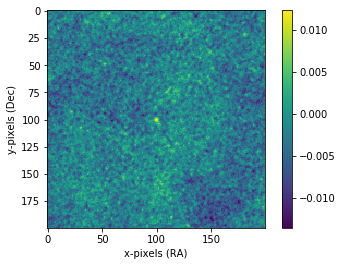

In [9]:
plt.imshow(data, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

### Find the brightest pixel

In [10]:
def brightest_index(data):
    return np.unravel_index(data.argmax(), data.shape)

In [11]:
brightest_index(data)

(100, 100)

## Mean of stacked fits files

In [12]:
def mean_fits(files):
    data = []
    for file in files:
        data.append(get_fits_data(file))
  
    return np.mean(data, axis=0)

In [13]:
files = ['data/images/image0.fits', 'data/images/image1.fits', 'data/images/image2.fits']

In [14]:
means = mean_fits(files)

In [15]:
means[100, 100]

0.017356586332122486

## Median of stacked fits files

In [16]:
def median_fits(files):
    data = []
    for file in files:
        data.append(get_fits_data(file))
        
    return np.median(data, axis=0)

In [17]:
files = ['data/images/image0.fits', 'data/images/image1.fits', 'data/images/image2.fits']

In [18]:
median = median_fits(files)

In [19]:
median[100,100]

0.012338057160377502

## Caculate Binapprox

In [6]:
def median_bins(values, B):
    mean = np.mean(values)
    std = np.std(values)
    
    left_bin = 0
    bins = np.zeros(B)
    bin_width = 2*std/B

    # Bin values
    for value in values:
        if value < mean - std:
          left_bin += 1
        elif value < mean + std:
          bin = int((value - (mean - std))/bin_width)
          bins[bin] += 1

    return mean, std, left_bin, bins

In [7]:
def median_approx(values, B):
    mean, std, left_bin, bins = median_bins(values, B)
    N = len(values)
    mid = (N + 1)/2

    count = left_bin
    for b, bincount in enumerate(bins):
        count += bincount
        if count >= mid:
            break

    width = 2*std/B
    median = mean - std + width*(b + 0.5)
    return median

In [8]:
print(median_bins([1, 1, 3, 2, 2, 6], 3))
print(median_approx([1, 1, 3, 2, 2, 6], 3))

(2.5, 1.707825127659933, 0, array([2., 3., 0.]))
2.5
